In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
pip install s3fs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 75.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.6.0
    Uninstalling fsspec-2023.6.0:
      Successfully uninstalled fsspec-2023.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2023.6.0 requires fsspec==2023.6.0, but you have fsspec 2023.10.0 which is incompatible.


In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
data = pd.read_csv('s3://abhilasha-lstw-11102023/TrafficEvents_Aug16_Dec20_Publish.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.describe()

,Severity,TMC,LocationLat,LocationLng,Distance(mi),Number,ZipCode
count,3.135558e+07,3.135558e+07,3.135558e+07,3.135558e+07,3.135558e+07,1.388519e+07,3.133148e+07
mean,1.314787e+00,1.172900e+02,3.712132e+01,-9.262498e+01,2.493480e+00,6.128311e+03,5.167362e+04
std,8.764115e-01,1.348410e+02,5.151707e+00,1.718985e+01,3.303033e+00,1.481554e+04,3.183471e+04
min,0.000000e+00,1.600000e+01,2.454662e+01,-1.246238e+02,0.000000e+00,0.000000e+00,1.001000e+03
25%,1.000000e+00,7.200000e+01,3.377224e+01,-1.082495e+02,6.600000e-01,8.000000e+02,2.215000e+04
50%,1.000000e+00,7.300000e+01,3.816291e+01,-8.680222e+01,1.830000e+00,2.686000e+03,4.815400e+04
75%,2.000000e+00,7.500000e+01,4.083509e+01,-7.788621e+01,3.360000e+00,7.138000e+03,8.320100e+04
max,4.000000e+00,1.974000e+03,4.900249e+01,-6.701227e+01,1.057800e+03,9.909720e+05,9.940300e+04


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31355575 entries, 0 to 31355574
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   EventId         object 
 1   Type            object 
 2   Severity        int64  
 3   TMC             int64  
 4   Description     object 
 5   StartTime(UTC)  object 
 6   EndTime(UTC)    object 
 7   TimeZone        object 
 8   LocationLat     float64
 9   LocationLng     float64
 10  Distance(mi)    float64
 11  AirportCode     object 
 12  Number          float64
 13  Street          object 
 14  Side            object 
 15  City            object 
 16  County          object 
 17  State           object 
 18  ZipCode         float64
dtypes: float64(5), int64(2), object(12)
memory usage: 4.4+ GB


In [ ]:
data.tail()

,EventId,Type,Severity,TMC,Description,StartTime(UTC),EndTime(UTC),TimeZone,LocationLat,LocationLng,Distance(mi),AirportCode,Number,Street,Side,City,County,State,ZipCode
31355570,T-31957558,Congestion,2,73,Delays of six minutes and delays easing on San...,2017-08-31 01:30:00,2017-08-31 03:39:15,US/Pacific,33.976925,-118.388062,5.80,KLAX,NaN,San Diego Fwy S,R,Los Angeles,Los Angeles,CA,90045.0
31355571,T-31957559,Flow-Incident,2,402,Road blocked due to large tire in the road on ...,2017-08-31 03:22:53,2017-08-31 03:52:12,US/Pacific,34.041412,-118.064323,0.00,KEMT,NaN,Pomona Fwy W,R,South El Monte,Los Angeles,CA,91733.0
31355572,T-31957560,Broken-Vehicle,3,211,Middle lane blocked due to stalled vehicle on ...,2017-08-31 03:24:16,2017-08-31 03:53:35,US/Pacific,34.106606,-118.255836,0.00,KCQT,2448.0,Fletcher Dr,R,Los Angeles,Los Angeles,CA,90039.0
31355573,T-31957561,Accident,2,201,Accident on Temescal Canyon Rd Eastbound in La...,2017-08-31 03:17:21,2017-08-31 03:47:21,US/Pacific,33.729469,-117.397354,0.00,KF70,14779.0,Temescal Canyon Rd,R,Lake Elsinore,Riverside,CA,92530.0
31355574,T-31957562,Congestion,3,72,Severe delays of 16 minutes and delays increas...,2017-08-31 02:32:00,2017-08-31 04:05:13,US/Pacific,34.087753,-118.475090,7.45,KSMO,NaN,I-405 N,R,Los Angeles,Los Angeles,CA,90049.0


In [ ]:
weather = pd.read_csv('s3://abhilasha-lstw-11102023/WeatherEvents_Aug16_Dec20_Publish.csv')

In [ ]:
weather.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,LocationLat,LocationLng,AirportCode,City,County,State,ZipCode
0,W-310,Rain,Light,2016-08-01 00:16:00,2016-08-01 00:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
1,W-311,Rain,Light,2016-08-01 01:16:00,2016-08-01 01:36:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
2,W-312,Rain,Light,2016-08-01 01:56:00,2016-08-01 02:16:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
3,W-313,Rain,Light,2016-08-01 02:36:00,2016-08-01 02:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
4,W-314,Rain,Light,2016-08-01 04:36:00,2016-08-01 04:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5576434 entries, 0 to 5576433
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   EventId         object 
 1   Type            object 
 2   Severity        object 
 3   StartTime(UTC)  object 
 4   EndTime(UTC)    object 
 5   TimeZone        object 
 6   LocationLat     float64
 7   LocationLng     float64
 8   AirportCode     object 
 9   City            object 
 10  County          object 
 11  State           object 
 12  ZipCode         float64
dtypes: float64(3), object(10)
memory usage: 553.1+ MB


In [ ]:
weather.tail()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,LocationLat,LocationLng,AirportCode,City,County,State,ZipCode
5576429,W-6161088,Snow,Light,2020-12-14 17:30:00,2020-12-15 01:53:00,US/Mountain,42.5833,-108.2833,KBVR,Lander,Fremont,WY,82520.0
5576430,W-6161089,Snow,Moderate,2020-12-15 01:53:00,2020-12-15 03:19:00,US/Mountain,42.5833,-108.2833,KBVR,Lander,Fremont,WY,82520.0
5576431,W-6161090,Snow,Light,2020-12-15 03:19:00,2020-12-15 05:53:00,US/Mountain,42.5833,-108.2833,KBVR,Lander,Fremont,WY,82520.0
5576432,W-6161091,Snow,Light,2020-12-23 04:24:00,2020-12-23 05:53:00,US/Mountain,42.5833,-108.2833,KBVR,Lander,Fremont,WY,82520.0
5576433,W-6161092,Snow,Light,2020-12-23 10:53:00,2020-12-23 11:26:00,US/Mountain,42.5833,-108.2833,KBVR,Lander,Fremont,WY,82520.0


In [ ]:
weather.describe()

,LocationLat,LocationLng,ZipCode
count,5.576434e+06,5.576434e+06,5.532804e+06
mean,3.875765e+01,-9.185531e+01,5.236033e+04
std,5.466117e+00,1.344209e+01,2.569405e+04
min,2.455710e+01,-1.245550e+02,1.022000e+03
25%,3.455750e+01,-9.779700e+01,3.109800e+04
50%,3.932000e+01,-8.978690e+01,5.382100e+04
75%,4.301940e+01,-8.189210e+01,7.340100e+04
max,4.894020e+01,-6.779280e+01,9.936200e+04


In [ ]:
data.Type.unique()

array(['Congestion', 'Flow-Incident', 'Accident', 'Lane-Blocked',
       'Broken-Vehicle', 'Construction', 'Event'], dtype=object)

In [ ]:
data.AirportCode.unique()

array(['KO69', 'KHAF', 'KWVI', ..., 'KAWH', 'KP69', 'KSHC'], dtype=object)

In [ ]:
data.columns.nunique()

19

In [ ]:
##Traffic Events Analysis
# Get all categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Initialize an empty dictionary to store unique values
unique_values_dict = {}

# Iterate through each categorical column
for col in categorical_columns:
    unique_values = data[col].unique()
    unique_values_dict[col] = unique_values

# Print unique values
for col, values in unique_values_dict.items():
    print(f'Unique values in {col}:')
    print(values)
    print('-' * 30)


Unique values in EventId:
['T-38768' 'T-38772' 'T-38775' ... 'T-31957560' 'T-31957561' 'T-31957562']
------------------------------
Unique values in Type:
['Congestion' 'Flow-Incident' 'Accident' 'Lane-Blocked' 'Broken-Vehicle'
 'Construction' 'Event']
------------------------------
Unique values in Description:
['Severe delays of 18 minutes on US-101 Redwood Hwy Southbound between Stony Point Rd and US-101 / US-101 Redwood Hwy. Average speed 15 mph.'
 'Delays of eight minutes on CA-92 San Mateo Rd Westbound between Mountain Dump Rd and CA-92 San Mateo Rd. Average speed five mph.'
 'Severe delays of 20 minutes and delays increasing on State Highway 1 Northbound between La Selva Dr and Soquel Dr. Average speed 15 mph.'
 ...
 'Middle lane blocked due to stalled vehicle on I-5 Southbound before Exit 140A Fletcher Dr.'
 'Accident on Temescal Canyon Rd Eastbound in Lake Elsinore.'
 'Severe delays of 16 minutes and delays increasing on San Diego Fwy Northbound between I-10 and I-405. Average

In [ ]:


# Convert columns to categorical
data.Type = data.Type.astype('category')
data.TimeZone = data.TimeZone.astype('category')
data.AirportCode = data.AirportCode.astype('category')
data.State = data.State.astype('category')
data.City = data.City.astype('category')
data.County = data.County.astype('category')

# Now the columns are converted to categorical type

In [ ]:
##Weather Events Analysis
# Get all categorical columns
categorical_columns = weather.select_dtypes(include=['object', 'category']).columns

# Initialize an empty dictionary to store unique values
unique_values_dict = {}

# Iterate through each categorical column
for col in categorical_columns:
    unique_values = weather[col].unique()
    unique_values_dict[col] = unique_values

# Print unique values
for col, values in unique_values_dict.items():
    print(f'Unique values in {col}:')
    print(values)
    print('-' * 30)


Unique values in EventId:
['W-310' 'W-311' 'W-312' ... 'W-6161090' 'W-6161091' 'W-6161092']
------------------------------
Unique values in Type:
['Rain' 'Snow' 'Cold' 'Storm' 'Fog' 'Precipitation' 'Hail']
------------------------------
Unique values in Severity:
['Light' 'Moderate' 'Heavy' 'Severe' 'UNK' 'Other']
------------------------------
Unique values in StartTime(UTC):
['2016-08-01 00:16:00' '2016-08-01 01:16:00' '2016-08-01 01:56:00' ...
 '2019-03-29 09:13:00' '2019-03-29 20:17:00' '2019-03-29 20:33:00']
------------------------------
Unique values in EndTime(UTC):
['2016-08-01 00:56:00' '2016-08-01 01:36:00' '2016-08-01 02:16:00' ...
 '2019-02-22 06:18:00' '2019-03-07 03:09:00' '2019-03-29 20:17:00']
------------------------------
Unique values in TimeZone:
['US/Mountain' 'US/Central' 'US/Eastern' 'US/Pacific']
------------------------------
Unique values in AirportCode:
['K04V' 'KAXS' 'KAEL' ... 'KB23' 'KARL' 'KBVR']
------------------------------
Unique values in City:
['Sa

In [ ]:
# Convert columns to categorical
weather.Type = weather.Type.astype('category')
weather.TimeZone = weather.TimeZone.astype('category')
weather.Severity = weather.Severity.astype('category')
weather.AirportCode = weather.AirportCode.astype('category')
weather.State = weather.State.astype('category')
weather.City = weather.City.astype('category')
weather.County = weather.County.astype('category')

# Now the columns are converted to categorical type

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31355575 entries, 0 to 31355574
Data columns (total 19 columns):
 #   Column          Dtype   
---  ------          -----   
 0   EventId         object  
 1   Type            category
 2   Severity        int64   
 3   TMC             int64   
 4   Description     object  
 5   StartTime(UTC)  object  
 6   EndTime(UTC)    object  
 7   TimeZone        category
 8   LocationLat     float64 
 9   LocationLng     float64 
 10  Distance(mi)    float64 
 11  AirportCode     category
 12  Number          float64 
 13  Street          object  
 14  Side            object  
 15  City            category
 16  County          category
 17  State           category
 18  ZipCode         float64 
dtypes: category(6), float64(5), int64(2), object(6)
memory usage: 3.3+ GB


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5576434 entries, 0 to 5576433
Data columns (total 13 columns):
 #   Column          Dtype   
---  ------          -----   
 0   EventId         object  
 1   Type            category
 2   Severity        category
 3   StartTime(UTC)  object  
 4   EndTime(UTC)    object  
 5   TimeZone        category
 6   LocationLat     float64 
 7   LocationLng     float64 
 8   AirportCode     category
 9   City            category
 10  County          category
 11  State           category
 12  ZipCode         float64 
dtypes: category(7), float64(3), object(3)
memory usage: 308.6+ MB


In [ ]:
accident_count = len(data[data['Type'] == 'Accident'])

In [ ]:
print(accident_count)

2638575


In [ ]:
accident_df = data[data['Type'] == 'Accident'].copy()

In [ ]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2638575 entries, 61 to 31355573
Data columns (total 19 columns):
 #   Column          Dtype   
---  ------          -----   
 0   EventId         object  
 1   Type            category
 2   Severity        int64   
 3   TMC             int64   
 4   Description     object  
 5   StartTime(UTC)  object  
 6   EndTime(UTC)    object  
 7   TimeZone        category
 8   LocationLat     float64 
 9   LocationLng     float64 
 10  Distance(mi)    float64 
 11  AirportCode     category
 12  Number          float64 
 13  Street          object  
 14  Side            object  
 15  City            category
 16  County          category
 17  State           category
 18  ZipCode         float64 
dtypes: category(6), float64(5), int64(2), object(6)
memory usage: 305.3+ MB


In [ ]:
accident_df.to_csv('accident_data.csv', index=False)

In [ ]:
accident_data = pd.read_csv('s3://abhilasha-lstw-11102023/accident_data.csv')

In [ ]:
accident_data.describe()

,Severity,TMC,LocationLat,LocationLng,Distance(mi),Number,ZipCode
count,2.638575e+06,2.638575e+06,2.638575e+06,2.638575e+06,2.638575e+06,1.049723e+06,2.638226e+06
mean,2.340344e+00,2.083166e+02,3.612236e+01,-9.336755e+01,2.007354e-01,4.913597e+03,5.422097e+04
std,4.822737e-01,2.126712e+01,4.841487e+00,1.625218e+01,1.588916e+00,9.810078e+03,2.955142e+04
min,0.000000e+00,2.000000e+02,2.455527e+01,-1.246238e+02,0.000000e+00,1.000000e+00,1.001000e+03
25%,2.000000e+00,2.010000e+02,3.318824e+01,-1.062966e+02,0.000000e+00,7.940000e+02,2.940600e+04
50%,2.000000e+00,2.010000e+02,3.541802e+01,-8.752540e+01,0.000000e+00,2.498000e+03,4.850600e+04
75%,3.000000e+00,2.010000e+02,3.999107e+01,-8.081963e+01,0.000000e+00,6.298000e+03,8.046500e+04
max,4.000000e+00,4.060000e+02,4.900220e+01,-6.783974e+01,4.417500e+02,9.904150e+05,9.940300e+04


In [ ]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2638575 entries, 0 to 2638574
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   EventId         object 
 1   Type            object 
 2   Severity        int64  
 3   TMC             int64  
 4   Description     object 
 5   StartTime(UTC)  object 
 6   EndTime(UTC)    object 
 7   TimeZone        object 
 8   LocationLat     float64
 9   LocationLng     float64
 10  Distance(mi)    float64
 11  AirportCode     object 
 12  Number          float64
 13  Street          object 
 14  Side            object 
 15  City            object 
 16  County          object 
 17  State           object 
 18  ZipCode         float64
dtypes: float64(5), int64(2), object(12)
memory usage: 382.5+ MB


In [ ]:
accident_data.head()

,EventId,Type,Severity,TMC,Description,StartTime(UTC),EndTime(UTC),TimeZone,LocationLat,LocationLng,Distance(mi),AirportCode,Number,Street,Side,City,County,State,ZipCode
0,T-38844,Accident,3,201,Accident on I-80 Eastbound at Exits 47 47A 47B...,2016-08-01 01:05:41,2016-08-01 01:35:41,US/Pacific,38.275646,-122.047577,0.0,KSUU,NaN,I-80 E,R,Fairfield,Solano,CA,94533.0
1,T-38975,Accident,2,201,Accident on US-101 Southbound at Exit 483 Rohn...,2016-08-01 03:08:16,2016-08-01 03:38:16,US/Pacific,38.348320,-122.713165,0.0,KO69,NaN,Redwood Hwy S,R,Rohnert Park,Sonoma,CA,94928.0
2,T-38983,Accident,2,201,Accident on US-101 Southbound at Exits 430A 43...,2016-08-01 03:09:06,2016-08-01 03:39:06,US/Pacific,37.734898,-122.408661,0.0,KSFO,NaN,I-280 S,R,San Francisco,San Francisco,CA,94134.0
3,T-38994,Accident,2,201,Accident on Mays Canyon Rd both ways at CA-116...,2016-08-01 03:11:04,2016-08-01 03:41:04,US/Pacific,38.485943,-122.961952,0.0,KSTS,11181.0,Pocket Canyon Rd,L,Guerneville,Sonoma,CA,95446.0
4,T-39006,Accident,2,201,Accident on Highway Ave Westbound at Siino Ave...,2016-08-01 03:16:52,2016-08-01 03:46:52,US/Pacific,38.028072,-121.934494,0.0,KCCR,101.0,Highway Ave,L,Bay Point,Contra Costa,CA,94565.0


Handling Missing Values

In [ ]:
accident_data.isnull().sum()

EventId                 0
Type                    0
Severity                0
TMC                     0
Description             2
StartTime(UTC)          0
EndTime(UTC)            0
TimeZone             2305
LocationLat             0
LocationLng             0
Distance(mi)            0
AirportCode          4716
Number            1588852
Street                  0
Side                    0
City                   51
County                  0
State                   0
ZipCode               349
dtype: int64

<Axes: >

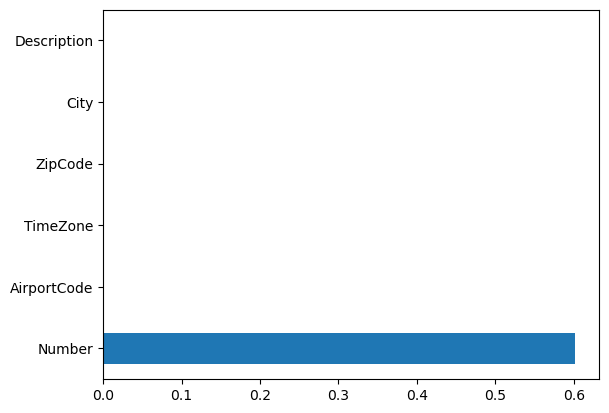

In [ ]:
missing_percentage = accident_data.isna().sum().sort_values(ascending = False) / len(accident_data)
missing_percentage[missing_percentage != 0].plot(kind = "barh")

In [ ]:
accident_main = accident_data.drop(columns=['EventId','County','TMC','Description','Number','Side','Street'])

In [ ]:
accident_main.isnull().sum()

Type              0
Severity          0
StartTime(UTC)    0
EndTime(UTC)      0
TimeZone          0
LocationLat       0
LocationLng       0
Distance(mi)      0
AirportCode       0
City              0
State             0
ZipCode           0
dtype: int64

In [ ]:
accident_main = accident_main[accident_main['ZipCode'].notnull()]
accident_main.head()

,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,LocationLat,LocationLng,Distance(mi),AirportCode,City,State,ZipCode
0,Accident,3,2016-08-01 01:05:41,2016-08-01 01:35:41,US/Pacific,38.275646,-122.047577,0.0,KSUU,Fairfield,CA,94533.0
1,Accident,2,2016-08-01 03:08:16,2016-08-01 03:38:16,US/Pacific,38.348320,-122.713165,0.0,KO69,Rohnert Park,CA,94928.0
2,Accident,2,2016-08-01 03:09:06,2016-08-01 03:39:06,US/Pacific,37.734898,-122.408661,0.0,KSFO,San Francisco,CA,94134.0
3,Accident,2,2016-08-01 03:11:04,2016-08-01 03:41:04,US/Pacific,38.485943,-122.961952,0.0,KSTS,Guerneville,CA,95446.0
4,Accident,2,2016-08-01 03:16:52,2016-08-01 03:46:52,US/Pacific,38.028072,-121.934494,0.0,KCCR,Bay Point,CA,94565.0


In [ ]:
accident_main = accident_main[accident_main['AirportCode'].notnull()]

In [ ]:
accident_main = accident_main[accident_main['City'].notnull()]

In [ ]:
weather.isnull().sum()

EventId               0
Type                  0
Severity              0
StartTime(UTC)        0
EndTime(UTC)          0
TimeZone              0
LocationLat           0
LocationLng           0
AirportCode           0
City              10784
County                0
State                 0
ZipCode           43630
dtype: int64

<AxesSubplot:>

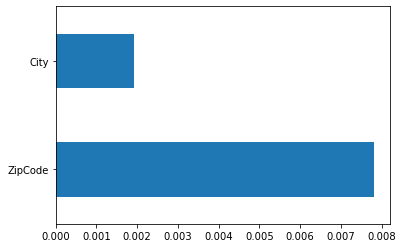

In [ ]:
missing_percentage = weather.isna().sum().sort_values(ascending = False) / len(weather)
missing_percentage[missing_percentage != 0].plot(kind = "barh")

<AxesSubplot:>

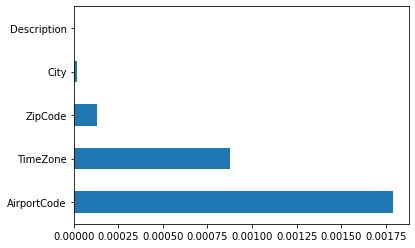

In [ ]:
missing_percentage = accident_main.isna().sum().sort_values(ascending = False) / len(accident_main)
missing_percentage[missing_percentage != 0].plot(kind = "barh")

In [ ]:
weather_main = weather.drop(columns=['EventId','County'])

In [ ]:
weather_main.isnull().sum()

Type              0
Severity          0
StartTime(UTC)    0
EndTime(UTC)      0
TimeZone          0
LocationLat       0
LocationLng       0
AirportCode       0
City              0
State             0
ZipCode           0
dtype: int64

In [ ]:
weather_main = weather_main[weather_main['ZipCode'].notnull()]
weather_main.head()

,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,LocationLat,LocationLng,AirportCode,City,State,ZipCode
0,Rain,Light,2016-08-01 00:16:00,2016-08-01 00:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,CO,81149.0
1,Rain,Light,2016-08-01 01:16:00,2016-08-01 01:36:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,CO,81149.0
2,Rain,Light,2016-08-01 01:56:00,2016-08-01 02:16:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,CO,81149.0
3,Rain,Light,2016-08-01 02:36:00,2016-08-01 02:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,CO,81149.0
4,Rain,Light,2016-08-01 04:36:00,2016-08-01 04:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,CO,81149.0


In [ ]:
weather_main['ZipCode'] = weather_main['ZipCode'].astype(int)

In [ ]:
weather_main.head()

,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,LocationLat,LocationLng,AirportCode,City,State,ZipCode
0,Rain,Light,2016-08-01 00:16:00,2016-08-01 00:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,CO,81149
1,Rain,Light,2016-08-01 01:16:00,2016-08-01 01:36:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,CO,81149
2,Rain,Light,2016-08-01 01:56:00,2016-08-01 02:16:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,CO,81149
3,Rain,Light,2016-08-01 02:36:00,2016-08-01 02:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,CO,81149
4,Rain,Light,2016-08-01 04:36:00,2016-08-01 04:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,CO,81149


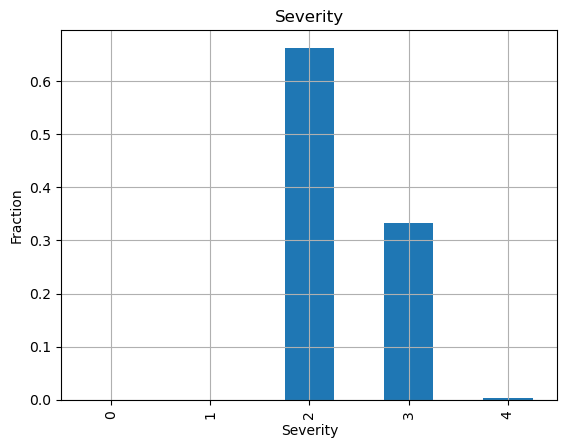

In [ ]:
accident_main.Severity.value_counts(normalize=True).sort_index().plot.bar()
plt.grid()
plt.title('Severity')
plt.xlabel('Severity')
plt.ylabel('Fraction');

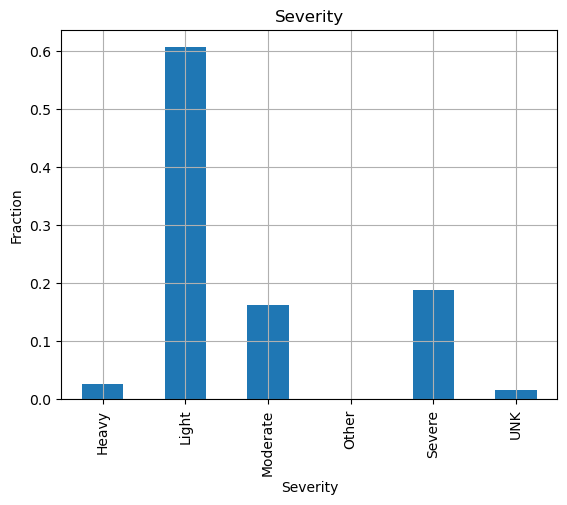

In [ ]:
weather_main.Severity.value_counts(normalize=True).sort_index().plot.bar()
plt.grid()
plt.title('Severity')
plt.xlabel('Severity')
plt.ylabel('Fraction');

In [ ]:
st = pd.to_datetime(accident_main['StartTime(UTC)'], format='%Y-%m-%d %H:%M:%S')
end = pd.to_datetime(accident_main['EndTime(UTC)'], format='%Y-%m-%d %H:%M:%S')

top 20 accident durations correspond to 28.1% of the data


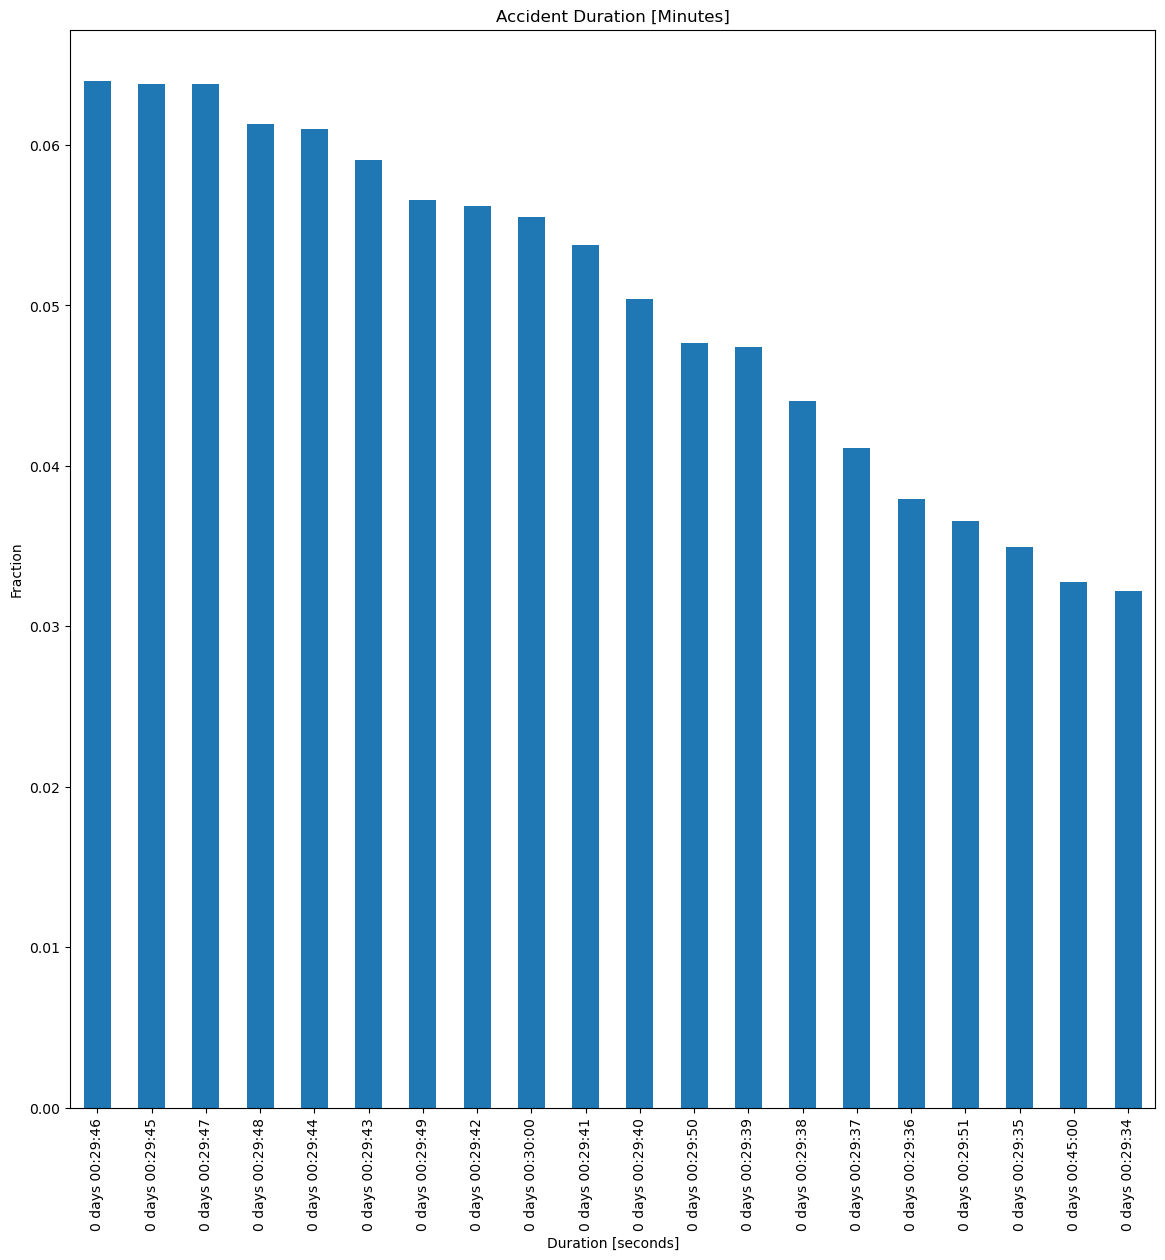

In [ ]:
diff = (end-st)
top20 = diff.astype('timedelta64[s]').value_counts().nlargest(20)
print('top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(diff)))
(top20/top20.sum()).plot.bar(figsize=(14,14))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [seconds]')
plt.ylabel('Fraction');

In [ ]:
accident_main = accident_main.drop(columns=['Type'])

In [ ]:
accident_main = accident_main.drop(columns=['Distance(mi)'])

In [ ]:
accident_main.head()

,Severity,StartTime(UTC),EndTime(UTC),TimeZone,LocationLat,LocationLng,AirportCode,City,State,ZipCode
0,3,2016-08-01 01:05:41,2016-08-01 01:35:41,US/Pacific,38.275646,-122.047577,KSUU,Fairfield,CA,94533.0
1,2,2016-08-01 03:08:16,2016-08-01 03:38:16,US/Pacific,38.348320,-122.713165,KO69,Rohnert Park,CA,94928.0
2,2,2016-08-01 03:09:06,2016-08-01 03:39:06,US/Pacific,37.734898,-122.408661,KSFO,San Francisco,CA,94134.0
3,2,2016-08-01 03:11:04,2016-08-01 03:41:04,US/Pacific,38.485943,-122.961952,KSTS,Guerneville,CA,95446.0
4,2,2016-08-01 03:16:52,2016-08-01 03:46:52,US/Pacific,38.028072,-121.934494,KCCR,Bay Point,CA,94565.0


In [ ]:
accident_main.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2633808 entries, 2016-08-01 01:05:41 to 2017-08-31 03:17:21
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Severity        int64  
 1   Description     object 
 2   StartTime(UTC)  object 
 3   EndTime(UTC)    object 
 4   TimeZone        object 
 5   LocationLat     float64
 6   LocationLng     float64
 7   Distance(mi)    float64
 8   AirportCode     object 
 9   City            object 
 10  County          object 
 11  State           object 
 12  ZipCode         float64
dtypes: float64(4), int64(1), object(8)
memory usage: 281.3+ MB


In [ ]:
accident_main.head()

,Severity,Description,StartTime(UTC),EndTime(UTC),TimeZone,LocationLat,LocationLng,Distance(mi),AirportCode,City,County,State,ZipCode
0,3,Accident on I-80 Eastbound at Exits 47 47A 47B...,2016-08-01 01:05:41,2016-08-01 01:35:41,US/Pacific,38.275646,-122.047577,0.0,KSUU,Fairfield,Solano,CA,94533.0
1,2,Accident on US-101 Southbound at Exit 483 Rohn...,2016-08-01 03:08:16,2016-08-01 03:38:16,US/Pacific,38.348320,-122.713165,0.0,KO69,Rohnert Park,Sonoma,CA,94928.0
2,2,Accident on US-101 Southbound at Exits 430A 43...,2016-08-01 03:09:06,2016-08-01 03:39:06,US/Pacific,37.734898,-122.408661,0.0,KSFO,San Francisco,San Francisco,CA,94134.0
3,2,Accident on Mays Canyon Rd both ways at CA-116...,2016-08-01 03:11:04,2016-08-01 03:41:04,US/Pacific,38.485943,-122.961952,0.0,KSTS,Guerneville,Sonoma,CA,95446.0
4,2,Accident on Highway Ave Westbound at Siino Ave...,2016-08-01 03:16:52,2016-08-01 03:46:52,US/Pacific,38.028072,-121.934494,0.0,KCCR,Bay Point,Contra Costa,CA,94565.0


Data Preparation

In [ ]:
accident_main['time'] = pd.to_datetime(accident_main['StartTime(UTC)'], format='%Y-%m-%d %H:%M:%S')
accident_main = accident_main.set_index('time')
accident_main.head()

,Severity,StartTime(UTC),EndTime(UTC),TimeZone,LocationLat,LocationLng,AirportCode,City,State,ZipCode
time,,,,,,,,,,
2016-08-01 01:05:41,3,2016-08-01 01:05:41,2016-08-01 01:35:41,US/Pacific,38.275646,-122.047577,KSUU,Fairfield,CA,94533.0
2016-08-01 03:08:16,2,2016-08-01 03:08:16,2016-08-01 03:38:16,US/Pacific,38.348320,-122.713165,KO69,Rohnert Park,CA,94928.0
2016-08-01 03:09:06,2,2016-08-01 03:09:06,2016-08-01 03:39:06,US/Pacific,37.734898,-122.408661,KSFO,San Francisco,CA,94134.0
2016-08-01 03:11:04,2,2016-08-01 03:11:04,2016-08-01 03:41:04,US/Pacific,38.485943,-122.961952,KSTS,Guerneville,CA,95446.0
2016-08-01 03:16:52,2,2016-08-01 03:16:52,2016-08-01 03:46:52,US/Pacific,38.028072,-121.934494,KCCR,Bay Point,CA,94565.0


In [ ]:
accident_main['StartTime(UTC)'] = pd.to_datetime(accident_main['StartTime(UTC)'], format='%Y-%m-%d %H:%M:%S')

# Create an empty list to store weekdays
weekdays = []

# Iterate through rows
for index, row in accident_main.iterrows():
    weekday = row['StartTime(UTC)'].strftime('%A')
    weekdays.append(weekday)

# Add the list of weekdays as a new column in the DataFrame
accident_main['Weekday'] = weekdays

In [ ]:
# Example: Convert int64 columns to int32
accident_main['Severity'] = accident_main['Severity'].astype('int32')
accident_main['ID'] = accident_main['ID'].astype('int32')
accident_main['ZipCode'] = accident_main['ZipCode'].astype('int32')
# Convert float64 to float32
float64_columns = accident_main.select_dtypes(include=['float64']).columns
accident_main[float64_columns] = accident_main[float64_columns].astype('float32')

# Convert float64 to float32
float64_columns = weather_main.select_dtypes(include=['float64']).columns
weather_main[float64_columns] = weather_main[float64_columns].astype('float32')

# Convert object to category
object_columns = accident_main.select_dtypes(include=['object']).columns
accident_main[object_columns] = accident_main[object_columns].astype('category')

object_columns = weather_main.select_dtypes(include=['object']).columns
weather_main[object_columns] = weather_main[object_columns].astype('category')
# Example: Convert int64 columns to int32
weather_main['ZipCode'] = weather_main['ZipCode'].astype('int32')

In [ ]:
accident_main.head()

,Severity,StartTime(UTC),EndTime(UTC),TimeZone,LocationLat,LocationLng,AirportCode,City,State,ZipCode,ID,Weekday,month,year
time,,,,,,,,,,,,,,
2016-08-01 01:05:41,3,2016-08-01 01:05:41,2016-08-01 01:35:41,US/Pacific,38.275646,-122.047577,KSUU,Fairfield,CA,94533,0,Monday,8,2016
2016-08-01 03:08:16,2,2016-08-01 03:08:16,2016-08-01 03:38:16,US/Pacific,38.348320,-122.713165,KO69,Rohnert Park,CA,94928,1,Monday,8,2016
2016-08-01 03:09:06,2,2016-08-01 03:09:06,2016-08-01 03:39:06,US/Pacific,37.734898,-122.408661,KSFO,San Francisco,CA,94134,2,Monday,8,2016
2016-08-01 03:11:04,2,2016-08-01 03:11:04,2016-08-01 03:41:04,US/Pacific,38.485943,-122.961952,KSTS,Guerneville,CA,95446,3,Monday,8,2016
2016-08-01 03:16:52,2,2016-08-01 03:16:52,2016-08-01 03:46:52,US/Pacific,38.028072,-121.934494,KCCR,Bay Point,CA,94565,4,Monday,8,2016


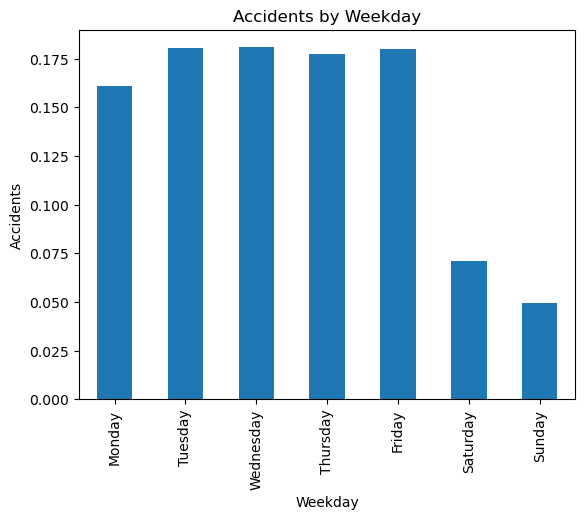

In [ ]:
weekday = accident_main.groupby('Weekday').Severity.count()
weekday = weekday/weekday.sum()
dayOfWeek=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday[dayOfWeek].plot.bar()
plt.title('Accidents by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Accidents');

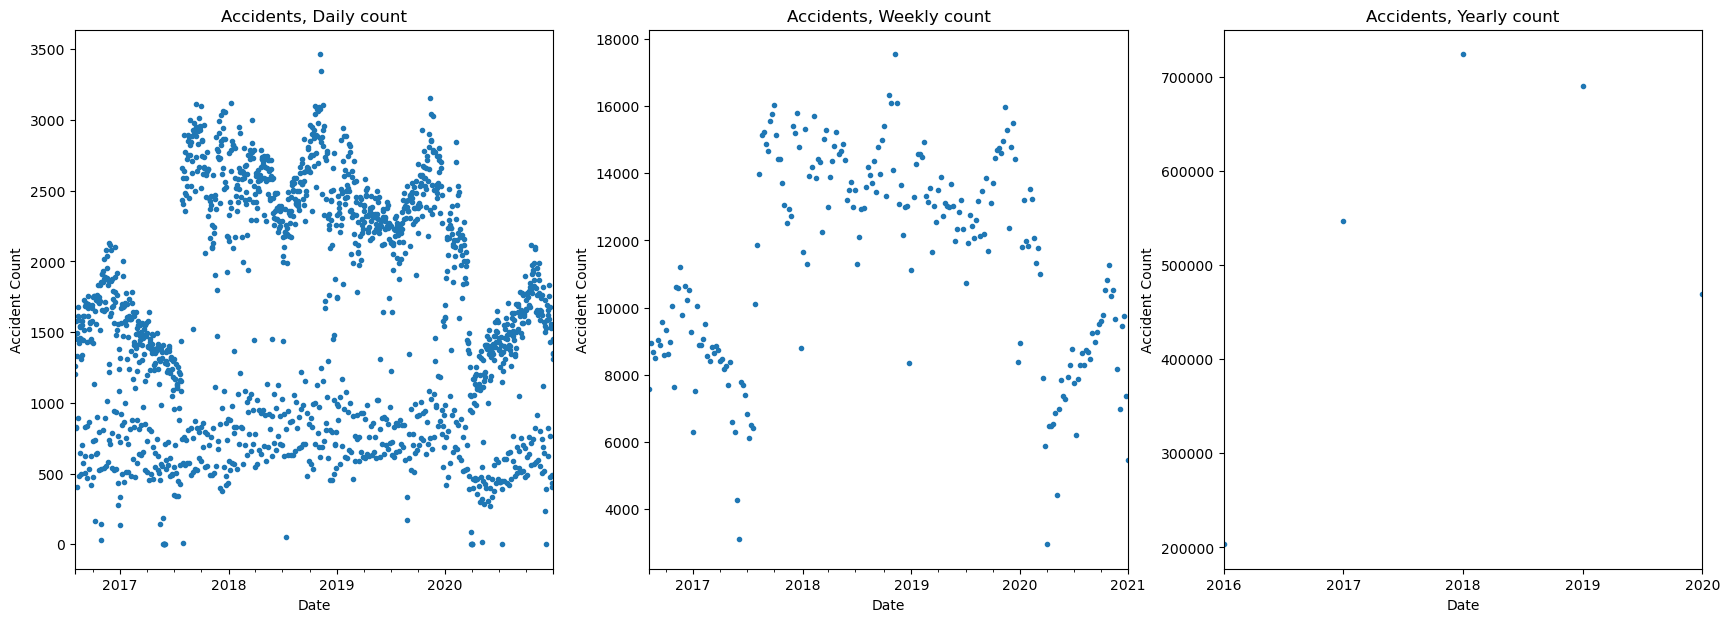

In [ ]:
freq_text = {'D':'Daily','W':'Weekly','Y':'Yearly'}
plt.subplots(1,3,figsize=(21,7))
for i, (fr,text) in enumerate(freq_text.items(),1):
    plt.subplot(1,3,i)
    sample = accident_main.year.resample(fr).count()
    sample.plot(style='.')
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

In [ ]:
# Create a month column
accident_main['month'] = accident_main['StartTime(UTC)'].dt.month

# Create a year column
accident_main['year'] = accident_main['StartTime(UTC)'].dt.year

In [ ]:
weather_main['StartTime(UTC)'] = pd.to_datetime(weather_main['StartTime(UTC)'], format='%Y-%m-%d %H:%M:%S')

# Create an empty list to store weekdays
weekdays = []

# Iterate through rows
for index, row in weather_main.iterrows():
    weekday = row['StartTime(UTC)'].strftime('%A')
    weekdays.append(weekday)

# Add the list of weekdays as a new column in the DataFrame
weather_main['Weekday'] = weekdays

In [ ]:
# Create a month column
weather_main['month'] = weather_main['StartTime(UTC)'].dt.month

# Create a year column
weather_main['year'] = weather_main['StartTime(UTC)'].dt.year

In [ ]:
accident_main['year'].unique()

array([2016, 2017, 2020, 2019, 2018], dtype=int32)

In [ ]:
weather_main['year'].unique()

array([2016, 2017, 2018, 2019, 2020], dtype=int32)

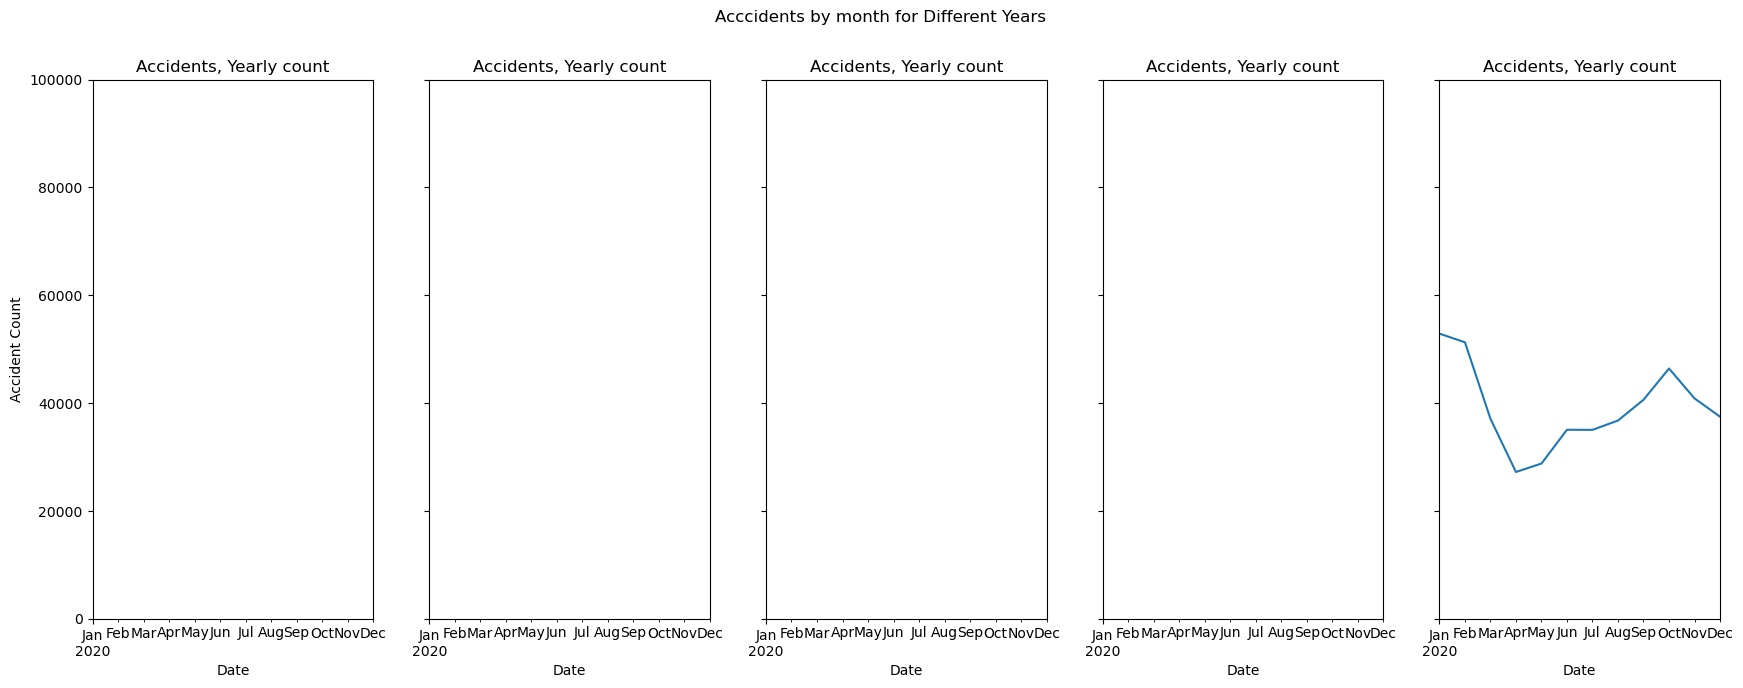

In [ ]:
years = ['2016','2017','2018','2019','2020']
fig, _ = plt.subplots(1,5,figsize=(21,7), sharex='all', sharey='all')

fig.suptitle('Acccidents by month for Different Years')
plt.xlabel('month')
plt.ylabel('Accidents')
for i, year in enumerate(years,1):
    plt.subplot(1,5,i)
    sample = accident_main.loc[year].ID.resample('M').count()
    sample.plot()
    plt.ylim(0,100000)
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

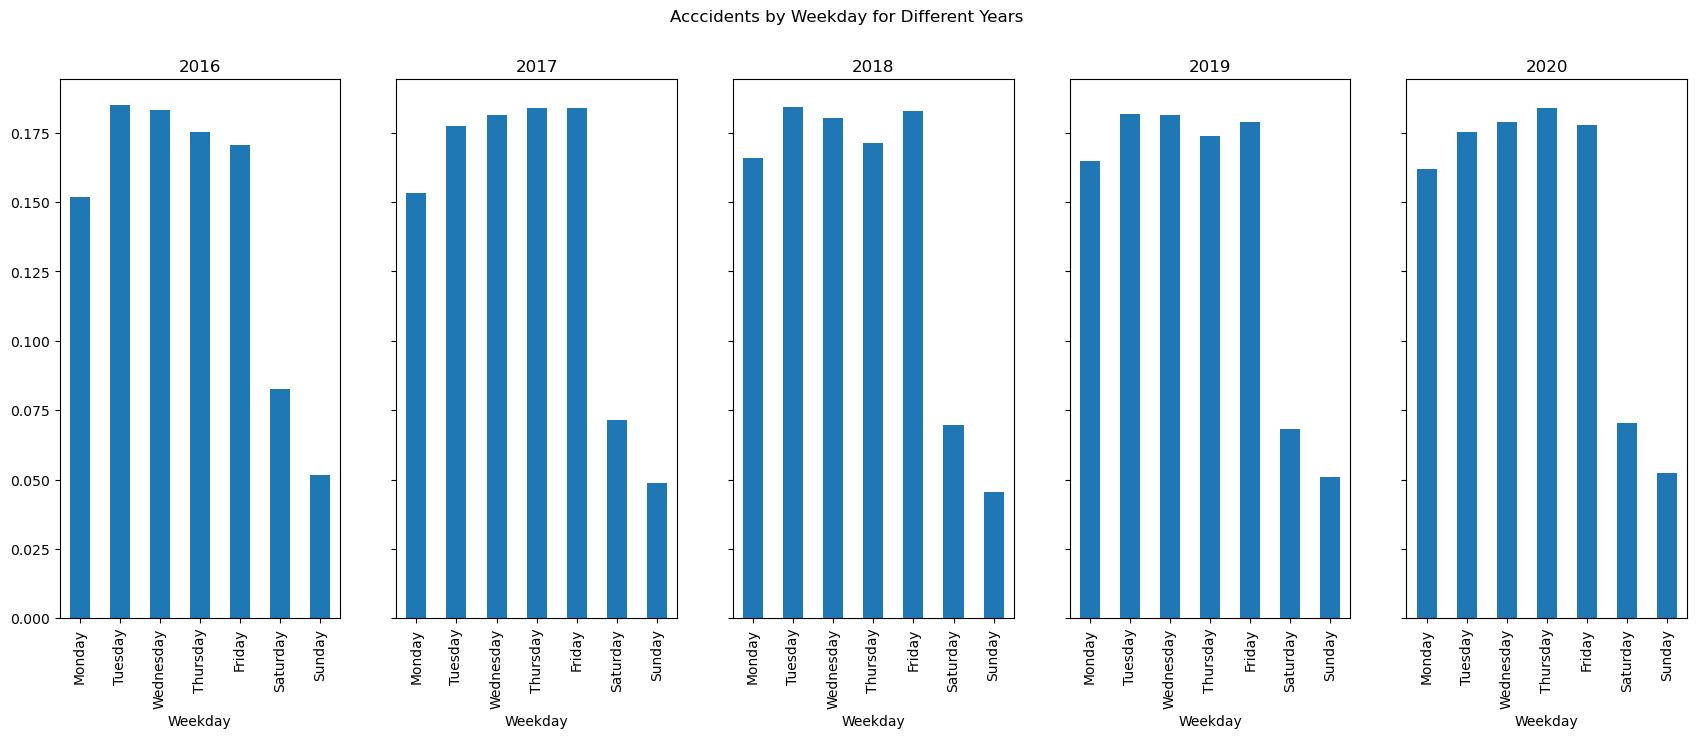

In [ ]:
years = ['2016','2017','2018','2019','2020']
fig, _ = plt.subplots(1,5,figsize=(21,7), sharex='all', sharey='all')

fig.suptitle('Acccidents by Weekday for Different Years')
plt.xlabel('Weekday')
plt.ylabel('Accidents')
for i, year in enumerate(years,1):
    weekday = accident_main.loc[year].groupby('Weekday').ID.count()
    weekday = weekday/weekday.sum()
    dayOfWeek=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    plt.subplot(1,5,i)
    plt.title(year)
    weekday[dayOfWeek].plot.bar()

In [ ]:
accident_main.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2633808 entries, 2016-08-01 01:05:41 to 2017-08-31 03:17:21
Data columns (total 14 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Severity        int32         
 1   StartTime(UTC)  datetime64[ns]
 2   EndTime(UTC)    datetime64[ns]
 3   TimeZone        category      
 4   LocationLat     float32       
 5   LocationLng     float32       
 6   AirportCode     category      
 7   City            category      
 8   State           category      
 9   ZipCode         int32         
 10  ID              int32         
 11  Weekday         category      
 12  month           int32         
 13  year            int32         
dtypes: category(5), datetime64[ns](2), float32(2), int32(5)
memory usage: 148.6 MB


In [ ]:
weather_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5532804 entries, 0 to 5576433
Data columns (total 14 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Type            category      
 1   Severity        category      
 2   StartTime(UTC)  datetime64[ns]
 3   EndTime(UTC)    datetime64[ns]
 4   TimeZone        category      
 5   LocationLat     float32       
 6   LocationLng     float32       
 7   AirportCode     category      
 8   City            category      
 9   State           category      
 10  ZipCode         int32         
 11  Weekday         category      
 12  month           int32         
 13  year            int32         
dtypes: category(7), datetime64[ns](2), float32(2), int32(3)
memory usage: 408.8 MB


In [ ]:
accident_main['EndTime(UTC)'] = pd.to_datetime(accident_main['EndTime(UTC)'], format='%Y-%m-%d %H:%M:%S')
weather_main['EndTime(UTC)'] = pd.to_datetime(weather_main['EndTime(UTC)'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
weather_main['Weekday'] = weather_main['Weekday'].astype('category')

In [ ]:
accident_main.to_csv('s3://abhilasha-lstw-11102023/accident_cleaned.csv', index=False)

In [ ]:
weather_main.to_csv('s3://abhilasha-lstw-11102023/weather_cleaned.csv', index=False)

In [ ]:
accident_main = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/accident_cleaned.csv')

In [ ]:
weather_main = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weather_cleaned.csv')

In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=a4d5e0eaeb37bb6f283c80147446e24fd49b05e63202beeab2d1375317ecb793
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
accident_main.info()
weather_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633808 entries, 0 to 2633807
Data columns (total 14 columns):
 #   Column          Dtype   
---  ------          -----   
 0   Severity        int32   
 1   StartTime(UTC)  category
 2   EndTime(UTC)    category
 3   TimeZone        category
 4   LocationLat     float32 
 5   LocationLng     float32 
 6   AirportCode     category
 7   City            category
 8   State           category
 9   ZipCode         int32   
 10  ID              int32   
 11  Weekday         category
 12  month           int32   
 13  year            int32   
dtypes: category(7), float32(2), int32(5)
memory usage: 276.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5532804 entries, 0 to 5532803
Data columns (total 14 columns):
 #   Column          Dtype   
---  ------          -----   
 0   Type            category
 1   Severity        category
 2   StartTime(UTC)  category
 3   EndTime(UTC)    category
 4   TimeZone        category
 5   LocationLat   

In [ ]:
# Example: Convert int64 columns to int32
accident_main['Severity'] = accident_main['Severity'].astype('int32')
accident_main['ID'] = accident_main['ID'].astype('int32')
accident_main['ZipCode'] = accident_main['ZipCode'].astype('int32')
accident_main['month'] = accident_main['month'].astype('int32')
accident_main['year'] = accident_main['year'].astype('int32')
weather_main['ZipCode'] = weather_main['ZipCode'].astype('int32')
weather_main['month'] = weather_main['month'].astype('int32')
weather_main['year'] = weather_main['year'].astype('int32')

# Convert float64 to float32
float64_columns = accident_main.select_dtypes(include=['float64']).columns
accident_main[float64_columns] = accident_main[float64_columns].astype('float32')
float64_columns = weather_main.select_dtypes(include=['float64']).columns
weather_main[float64_columns] = weather_main[float64_columns].astype('float32')

# Convert object to category
object_columns = accident_main.select_dtypes(include=['object']).columns
accident_main[object_columns] = accident_main[object_columns].astype('category')
object_columns = weather_main.select_dtypes(include=['object']).columns
weather_main[object_columns] = weather_main[object_columns].astype('category')


In [ ]:
len(accident_main[accident_main['Severity'] == 1])

1080

Checking length of data yearwise

In [ ]:
len(accident_main[accident_main['year'] == 2016])

203448

In [ ]:
len(accident_main[accident_main['year'] == 2017])

546650

In [ ]:
len(accident_main[accident_main['year'] == 2018])

723936

In [ ]:
len(accident_main[accident_main['year'] == 2019])

690655

In [ ]:
len(accident_main[accident_main['year'] == 2020])

469119

In [ ]:
len(weather_main[weather_main['year'] == 2016])

484814

In [ ]:
len(weather_main[weather_main['year'] == 2017])

1217795

In [ ]:
len(weather_main[weather_main['year'] == 2018])

1318505

In [ ]:
len(weather_main[weather_main['year'] == 2019])

1307472

In [ ]:
len(weather_main[weather_main['year'] == 2020])

1204218

Checking for any duplicated rows

In [ ]:
duplicate_rows = accident_main[accident_main.duplicated()]


print("\nDuplicate Rows:")
print(duplicate_rows)



Duplicate Rows:
Empty DataFrame
Columns: [Severity, StartTime(UTC), EndTime(UTC), TimeZone, LocationLat, LocationLng, AirportCode, City, State, ZipCode, ID, Weekday, month, year]
Index: []


In [ ]:
duplicate_rows_1 = weather_main[weather_main.duplicated()]


print("\nDuplicate Rows:")
print(duplicate_rows_1)


Duplicate Rows:
Empty DataFrame
Columns: [Type, Severity, StartTime(UTC), EndTime(UTC), TimeZone, LocationLat, LocationLng, AirportCode, City, State, ZipCode, Weekday, month, year]
Index: []


Splitting the data yearwise

In [ ]:

# Get the unique years
years = accident_main['year'].unique()

# Create a list to store the dataframes for each year
yearly_dataframes = []

# Iterate over the years and create a dataframe for each year with no duplicates
for year in years:
    year_dataframe = accident_main[accident_main['year'] == year]
    year_dataframe.drop_duplicates(inplace=True)
    yearly_dataframes.append(year_dataframe)

# Save the yearly dataframes to separate CSV files
for i in range(len(yearly_dataframes)):
    yearly_dataframes[i].to_csv('accident_' + str(years[i]) + '.csv', index=False)


In [ ]:

# Get the unique years
years = weather_main['year'].unique()

# Create a list to store the dataframes for each year
yearly_dataframes = []

# Iterate over the years and create a dataframe for each year with no duplicates
for year in years:
    year_dataframe = weather_main[weather_main['year'] == year]
    year_dataframe.drop_duplicates(inplace=True)
    yearly_dataframes.append(year_dataframe)

# Save the yearly dataframes to separate CSV files
for i in range(len(yearly_dataframes)):
    yearly_dataframes[i].to_csv('weather_' + str(years[i]) + '.csv', index=False)


In [ ]:
accident_2016 = pd.read_csv('/content/accident_2016.csv')
accident_2017 = pd.read_csv('/content/accident_2017.csv')
accident_2018 = pd.read_csv('/content/accident_2018.csv')
accident_2019 = pd.read_csv('/content/accident_2019.csv')
accident_2020 = pd.read_csv('/content/accident_2020.csv')

In [ ]:
weather_2016 = pd.read_csv('/content/weather_2016.csv')
weather_2017 = pd.read_csv('/content/weather_2017.csv')
weather_2018 = pd.read_csv('/content/weather_2018.csv')
weather_2019 = pd.read_csv('/content/weather_2019.csv')
weather_2020 = pd.read_csv('/content/weather_2020.csv')

In [ ]:
accident_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203448 entries, 0 to 203447
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Severity        203448 non-null  int64  
 1   StartTime(UTC)  203448 non-null  object 
 2   EndTime(UTC)    203448 non-null  object 
 3   TimeZone        203448 non-null  object 
 4   LocationLat     203448 non-null  float64
 5   LocationLng     203448 non-null  float64
 6   AirportCode     203448 non-null  object 
 7   City            203448 non-null  object 
 8   State           203448 non-null  object 
 9   ZipCode         203448 non-null  int64  
 10  ID              203448 non-null  int64  
 11  Weekday         203448 non-null  object 
 12  month           203448 non-null  int64  
 13  year            203448 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 21.7+ MB


In [ ]:
weather_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484814 entries, 0 to 484813
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Type            484814 non-null  object 
 1   Severity        484814 non-null  object 
 2   StartTime(UTC)  484814 non-null  object 
 3   EndTime(UTC)    484814 non-null  object 
 4   TimeZone        484814 non-null  object 
 5   LocationLat     484814 non-null  float64
 6   LocationLng     484814 non-null  float64
 7   AirportCode     484814 non-null  object 
 8   City            484814 non-null  object 
 9   State           484814 non-null  object 
 10  ZipCode         484814 non-null  int64  
 11  Weekday         484814 non-null  object 
 12  month           484814 non-null  int64  
 13  year            484814 non-null  int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 51.8+ MB


In [ ]:
# Convert the date time column to datetime64 type
accident_2016['date_time'] = pd.to_datetime(accident_2016['StartTime(UTC)'])

# Get the date from the date time column
accident_2016['date'] = accident_2016['date_time'].dt.date

In [ ]:
# Convert the date time column to datetime64 type
weather_2016['date_time'] = pd.to_datetime(weather_2016['StartTime(UTC)'])

# Get the date from the date time column
weather_2016['date'] = weather_2016['date_time'].dt.date

In [ ]:
accident_2016.head()

,Severity,StartTime(UTC),EndTime(UTC),TimeZone,LocationLat,LocationLng,AirportCode,City,State,ZipCode,ID,Weekday,month,year,date_time,date
0,3,2016-08-01 01:05:41,2016-08-01 01:35:41,US/Pacific,38.275646,-122.047580,KSUU,Fairfield,CA,94533,0,Monday,8,2016,2016-08-01 01:05:41,2016-08-01
1,2,2016-08-01 03:08:16,2016-08-01 03:38:16,US/Pacific,38.348320,-122.713165,KO69,Rohnert Park,CA,94928,1,Monday,8,2016,2016-08-01 03:08:16,2016-08-01
2,2,2016-08-01 03:09:06,2016-08-01 03:39:06,US/Pacific,37.734898,-122.408660,KSFO,San Francisco,CA,94134,2,Monday,8,2016,2016-08-01 03:09:06,2016-08-01
3,2,2016-08-01 03:11:04,2016-08-01 03:41:04,US/Pacific,38.485943,-122.961950,KSTS,Guerneville,CA,95446,3,Monday,8,2016,2016-08-01 03:11:04,2016-08-01
4,2,2016-08-01 03:16:52,2016-08-01 03:46:52,US/Pacific,38.028072,-121.934494,KCCR,Bay Point,CA,94565,4,Monday,8,2016,2016-08-01 03:16:52,2016-08-01


In [ ]:
weather_2016.head()

,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,LocationLat,LocationLng,AirportCode,City,State,ZipCode,Weekday,month,year,date_time,date
0,Rain,Light,2016-08-01 00:16:00,2016-08-01 00:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,CO,81149,Monday,8,2016,2016-08-01 00:16:00,2016-08-01
1,Rain,Light,2016-08-01 01:16:00,2016-08-01 01:36:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,CO,81149,Monday,8,2016,2016-08-01 01:16:00,2016-08-01
2,Rain,Light,2016-08-01 01:56:00,2016-08-01 02:16:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,CO,81149,Monday,8,2016,2016-08-01 01:56:00,2016-08-01
3,Rain,Light,2016-08-01 02:36:00,2016-08-01 02:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,CO,81149,Monday,8,2016,2016-08-01 02:36:00,2016-08-01
4,Rain,Light,2016-08-01 04:36:00,2016-08-01 04:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,CO,81149,Monday,8,2016,2016-08-01 04:36:00,2016-08-01


Merging 2016 Data

In [ ]:
data_2016 = accident_2016.merge(weather_2016, on=['date', 'AirportCode', 'ZipCode','TimeZone','Weekday','month','year','State','City','TimeZone'], how='inner')
data_2017 = accident_2017.merge(weather_2017, on=['date', 'AirportCode', 'ZipCode','TimeZone','Weekday','month','year','State','City','TimeZone'], how='inner')
data_2018 = accident_2018.merge(weather_2018, on=['date', 'AirportCode', 'ZipCode','TimeZone','Weekday','month','year','State','City','TimeZone'], how='inner')
data_2019 = accident_2019.merge(weather_2019, on=['date', 'AirportCode', 'ZipCode','TimeZone','Weekday','month','year','State','City','TimeZone'], how='inner')
data_2020 = accident_2020.merge(weather_2020, on=['date', 'AirportCode', 'ZipCode','TimeZone','Weekday','month','year','State','City','TimeZone'], how='inner')

In [ ]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18440 entries, 0 to 18439
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Severity_x        18440 non-null  int64         
 1   StartTime(UTC)_x  18440 non-null  object        
 2   EndTime(UTC)_x    18440 non-null  object        
 3   TimeZone          18440 non-null  object        
 4   LocationLat_x     18440 non-null  float64       
 5   LocationLng_x     18440 non-null  float64       
 6   AirportCode       18440 non-null  object        
 7   City              18440 non-null  object        
 8   State             18440 non-null  object        
 9   ZipCode           18440 non-null  int64         
 10  ID                18440 non-null  int64         
 11  Weekday           18440 non-null  object        
 12  month             18440 non-null  int64         
 13  year              18440 non-null  int64         
 14  date_time_x       1844

In [ ]:
data_2016.head()

,Severity_x,StartTime(UTC)_x,EndTime(UTC)_x,TimeZone,LocationLat_x,LocationLng_x,AirportCode,City,State,ZipCode,...,year,date_time_x,date,Type,Severity_y,StartTime(UTC)_y,EndTime(UTC)_y,LocationLat_y,LocationLng_y,date_time_y
0,2,2016-12-01 03:38:32,2016-12-01 04:08:21,US/Pacific,39.169224,-123.21139,KUKI,Ukiah,CA,95482,...,2016,2016-12-01 03:38:32,2016-12-01,Fog,Severe,2016-12-01 11:27:00,2016-12-01 11:34:00,39.1278,-123.2001,2016-12-01 11:27:00
1,2,2016-12-01 03:57:44,2016-12-01 04:27:26,US/Pacific,37.371304,-120.61373,KMER,Atwater,CA,95301,...,2016,2016-12-01 03:57:44,2016-12-01,Fog,Moderate,2016-12-01 14:45:00,2016-12-01 15:45:00,37.3805,-120.5682,2016-12-01 14:45:00
2,2,2016-12-01 05:13:53,2016-12-01 05:43:53,US/Pacific,37.500683,-122.24131,KSQL,San Carlos,CA,94070,...,2016,2016-12-01 05:13:53,2016-12-01,Cold,Severe,2016-12-01 21:47:00,2016-12-01 22:47:00,37.5119,-122.2483,2016-12-01 21:47:00
3,2,2016-12-01 19:34:31,2016-12-01 20:03:44,US/Pacific,38.243504,-122.26866,KAPC,Napa,CA,94558,...,2016,2016-12-01 19:34:31,2016-12-01,Fog,Severe,2016-12-01 12:17:00,2016-12-01 12:56:00,38.2132,-122.2807,2016-12-01 12:17:00
4,2,2016-12-01 19:34:31,2016-12-01 20:03:44,US/Pacific,38.243504,-122.26866,KAPC,Napa,CA,94558,...,2016,2016-12-01 19:34:31,2016-12-01,Fog,Severe,2016-12-01 13:32:00,2016-12-01 14:29:00,38.2132,-122.2807,2016-12-01 13:32:00


In [ ]:
# prompt: export the data into csv

data_2016.to_csv('data_2016.csv', index=False)
data_2017.to_csv('data_2017.csv', index=False)
data_2018.to_csv('data_2018.csv', index=False)
data_2019.to_csv('data_2019.csv', index=False)
data_2020.to_csv('data_2020.csv', index=False)